In [26]:
# Import Basic Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [5]:
data = pd.read_csv("data/stud.csv")

In [7]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
X = data.drop(columns=["math_score"], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [14]:
y = data["math_score"]
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [20]:
# Create Columns transformer with 3 types of transformers.
num_fetures = X.select_dtypes(exclude="object").columns
cat_feature = X.select_dtypes(include="object").columns

numeric_features = StandardScaler()
one_hot_transformer = OneHotEncoder()

# It will combine all the Columns together.
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_transformer, cat_feature),
        ("StandardScaler", numeric_features, num_fetures)
    ]
)

In [21]:
X = preprocessor.fit_transform(X)

In [24]:
X[0]

array([1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.19399858, 0.39149181])

In [25]:
X.shape

(1000, 19)

In [27]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((700, 19), (300, 19))

In [28]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    r2_scores = r2_score(true, pred)
    return mae, mse, rmse, r2_scores

In [33]:
models = {
    "linear_regression": LinearRegression(),
    "lasso": Lasso(),
    "ridge": Ridge(),
    "k_neighbors_regression": KNeighborsRegressor(),
    "decision_tree": DecisionTreeRegressor(),
    "random_forest_regressor": RandomForestRegressor(),
    "xgb_regressor": XGBRegressor(),
    "catboost_regression": CatBoostRegressor(),
    "adaboost_regression": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train Model

    # Make Predictation.
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2_score = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2_score = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training set!")
    print(f"~ Root Mean Squared Error: {model_train_rmse}")
    print(f"~ Mean Squared Error: {model_train_mse}")
    print(f"~ Mean Absolute Error: {model_train_mae}")
    print(f"~ R2 Score Error: {model_train_r2_score}")
    
    print('='*40)

    print("Model Performance for Testing set!")
    print(f"~ Root Mean Squared Error: {model_test_rmse}")
    print(f"~ Mean Squared Error: {model_test_mse}")
    print(f"~ Mean Absolute Error: {model_test_mae}")
    print(f"~ R2 Score Error: {model_test_r2_score}")
    r2_list.append(model_test_r2_score)

    print('='*40)
    print("\n")

linear_regression
Model Performance for Training set!
~ Root Mean Squared Error: 5.2539640115651185
~ Mean Squared Error: 27.60413783482143
~ Mean Absolute Error: 4.193214285714285
~ R2 Score Error: 0.8748618620239239
Model Performance for Testing set!
~ Root Mean Squared Error: 5.568758183682726
~ Mean Squared Error: 31.011067708333332
~ Mean Absolute Error: 4.431875
~ R2 Score Error: 0.8753627661417278


lasso
Model Performance for Training set!
~ Root Mean Squared Error: 6.510566005964603
~ Mean Squared Error: 42.38746971802188
~ Mean Absolute Error: 5.158226125142767
~ R2 Score Error: 0.807844422971275
Model Performance for Testing set!
~ Root Mean Squared Error: 6.870524041050993
~ Mean Squared Error: 47.20410059865967
~ Mean Absolute Error: 5.392913577222256
~ R2 Score Error: 0.8102810073900306


ridge
Model Performance for Training set!
~ Root Mean Squared Error: 5.248655272909648
~ Mean Squared Error: 27.54838217384225
~ Mean Absolute Error: 4.1976769609022035
~ R2 Score Error:

## Results

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["model_name", "r2_score"]).sort_values(by=["r2_score"], ascending=False)

,model_name,r2_score
2,ridge,0.875907
0,linear_regression,0.875363
7,catboost_regression,0.852108
5,random_forest_regressor,0.845504
6,xgb_regressor,0.842395
8,adaboost_regression,0.834205
1,lasso,0.810281
3,k_neighbors_regression,0.772528
4,decision_tree,0.718970


## Linear Regression

In [36]:
lin_model = LinearRegression(fit_intercept=True)
iin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model {score}")

Accuracy of the model 87.53627661417278


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

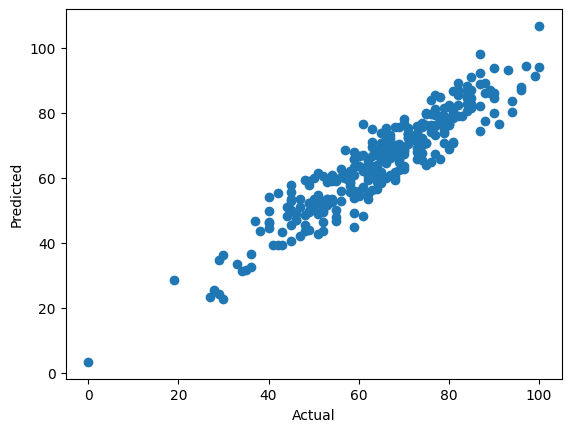

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

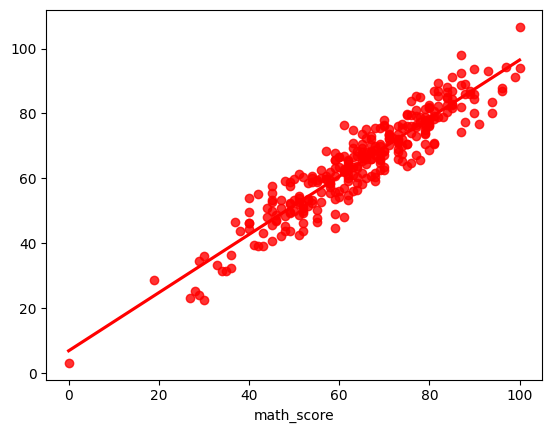

In [38]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")

### Difference between Actual and Predicted Values

In [39]:
pred_df = pd.DataFrame({"actual_value": y_test, 'predicted_value': y_pred, "difference": (y_test-y_pred)})
pred_df

,actual_value,predicted_value,difference
521,91,76.62500,14.37500
737,53,58.75000,-5.75000
740,80,76.96875,3.03125
660,74,76.84375,-2.84375
411,84,88.15625,-4.15625
...,...,...,...
468,77,73.00000,4.00000
935,70,62.56250,7.43750
428,65,58.40625,6.59375
7,40,44.53125,-4.53125
